**آماده‌سازی دیتاها .1:**

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# بارگزاری دیتاست
data = pd.read_csv('/content/sample_data/bank-additional-full.csv', delimiter=';')

# بررسی اطلاعات کلی
print("Dataset Info:")
print(data.info())

# مدیریت مقادیر و اطمینان از عددی بودن تمام مقادیر ستون‌ها برای برسی
for column in data.columns:
    if data[column].dtype == 'object': 
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:  
        data[column].fillna(data[column].median(), inplace=True) 

# تبدیل متغیرهای متنی به عددی 
data = pd.get_dummies(data, drop_first=True)

# نرمال‌سازی داده‌های عددی
scaler = MinMaxScaler()
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# نمایش نمونه‌ای از داده‌های پردازش‌شده
print("\nProcessed Data Sample:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   4

<ipython-input-1-e8b574be6dd8>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)  # جایگزینی با میانه
<ipython-input-1-e8b574be6dd8>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

**2. K-Means خوشه‌بندی با الگوریتم:**

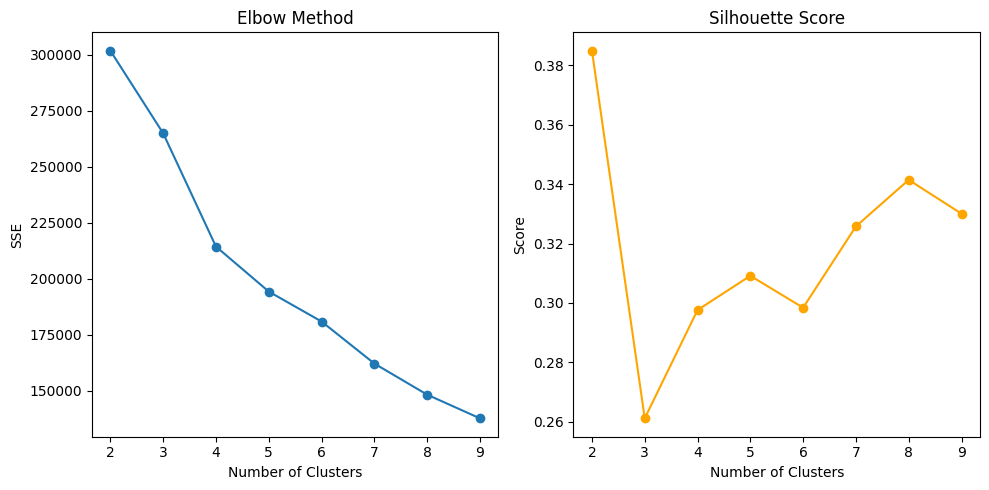

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# ویژگی‌های دیتاست که می‌توان از آنها برای خوشه‌بندی و کلسترینگ استفاده نمود:
selected_features = [
    'housing', 'loan', 'contact', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
]

# انتخاب ویژگی برای کلسترینگ
data_encoded = data.copy()
for col in ['housing', 'loan', 'contact']:
    encoder = LabelEncoder()
    data_encoded[col] = encoder.fit_transform(data_encoded[col])

# نرمال‌سازی ویژگی‌های انتخابی
financial_data = data_encoded[selected_features]
scaler = StandardScaler()
normalized_financial_data = scaler.fit_transform(financial_data)

# مصورسازی کلسیفیکیشن و معیارسنجی با نمودار
sse = []
silhouette_scores = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_financial_data)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(normalized_financial_data, kmeans.labels_))

plt.figure(figsize=(10, 5))

# Elbow نمودار
plt.subplot(1, 2, 1)
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

# Silhouette نمودار
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

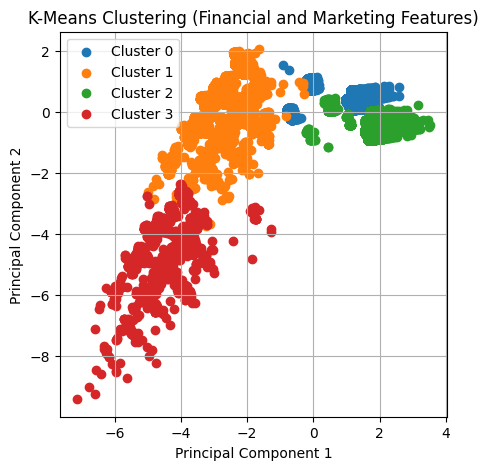

In [3]:
# اعمال خوشه‌بندی با تعداد 4 شاخه
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_encoded['Cluster'] = kmeans.fit_predict(normalized_financial_data)

# مصورسازی خوشه‌بندی با استفاده از نمودار PCA
pca_financial = PCA(n_components=2)
pca_financial_data = pca_financial.fit_transform(normalized_financial_data)
data_encoded['PCA1'], data_encoded['PCA2'] = pca_financial_data[:, 0], pca_financial_data[:, 1]

plt.figure(figsize=(5, 5))
for cluster in range(optimal_k):
    cluster_data = data_encoded[data_encoded['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering (Financial and Marketing Features)')
plt.legend()
plt.grid()
plt.show()

**3. تحلیل (AHP):**

In [4]:
pip install ahpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 2.6 MB/s eta 0:00:00


{
    "name": "Criteria",
    "global_weight": 1.0,
    "local_weight": 1.0,
    "target_weights": {
        "pdays": 0.547,
        "previous": 0.263,
        "campaign": 0.19
    },
    "elements": {
        "global_weights": {
            "pdays": 0.547,
            "previous": 0.263,
            "campaign": 0.19
        },
        "local_weights": {
            "pdays": 0.547,
            "previous": 0.263,
            "campaign": 0.19
        },
        "consistency_ratio": 0.138
    }
}
وزن معیارها:
pdays: 0.547
previous: 0.263
campaign: 0.190
Consistency Ratio: 0.138
هشدار: نسبت سازگاری بالاست. لطفاً وزن‌دهی‌ها را بازبینی کنید.



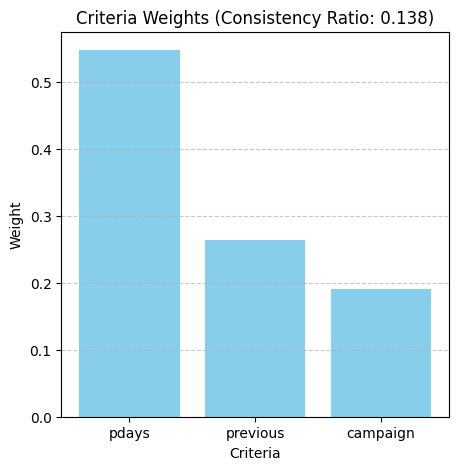

In [5]:
from ahpy import Compare

# تعریف معیارها و وزن‌دهی آن‌ها
criteria = {
    ('pdays', 'campaign'): 2,      # campaign کمی مهم‌تر از pdays
    ('pdays', 'previous'): 3,      # previous بسیار مهم‌تر از pdays
    ('campaign', 'previous'): 1/2  # دارد previous اهمیت کمتری از campaign
}

# ساخت ماتریس مقایسه
criteria_comparison = Compare('Criteria', criteria, precision=3)

# گزارش ماتریس مقایسه
criteria_weights = criteria_comparison.report(show=True)

# نمایش وزن معیارها
if 'elements' in criteria_weights and 'global_weights' in criteria_weights['elements']:
    weights = criteria_weights['elements']['global_weights']
    print("وزن معیارها:")
    for key, value in weights.items():
        print(f"{key}: {value:.3f}")
else:
    print("وزن معیارها یافت نشد.")

# بررسی نسبت سازگاری
if 'elements' in criteria_weights and 'consistency_ratio' in criteria_weights['elements']:
    consistency_ratio = criteria_weights['elements']['consistency_ratio']
    print(f"Consistency Ratio: {consistency_ratio}")
    if consistency_ratio > 0.1:
        print("هشدار: نسبت سازگاری بالاست. لطفاً وزن‌دهی‌ها را بازبینی کنید.")
        print("")
else:
    print("Consistency Ratio در خروجی یافت نشد.")

# مصورسازی وزن معیارها
weights = criteria_weights['elements']['global_weights']
labels = list(weights.keys())
values = list(weights.values())

plt.figure(figsize=(5, 5))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Criteria')
plt.ylabel('Weight')
plt.title(f'Criteria Weights (Consistency Ratio: {consistency_ratio:.3f})')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**4. تحلیل مدل کانو:**

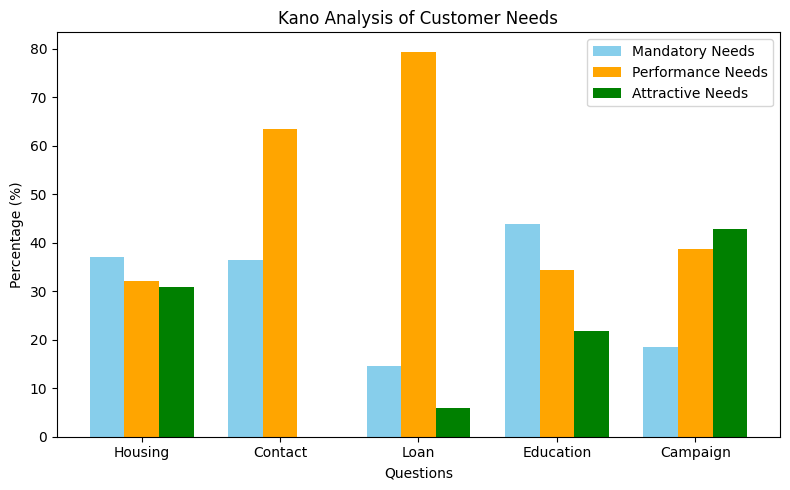

    Question  Mandatory  Performance  Attractive  Total  Mandatory_Pct  \
0    Housing      21576        18622       17885  58083      37.146842   
1    Contact      15044        26144           0  41188      36.525202   
2       Loan       6248        33950        2557  42755      14.613495   
3  Education      12168         9515        6045  27728      43.883439   
4   Campaign       7635        15911       17642  41188      18.536953   

   Performance_Pct  Attractive_Pct  
0        32.061016       30.792142  
1        63.474798        0.000000  
2        79.405917        5.980587  
3        34.315493       21.801068  
4        38.630184       42.832864  


In [8]:
# فرضیات برای ستون‌ها و نوع نیازهای Kano
data_kano = pd.DataFrame({
    "Question": ["Housing", "Contact", "Loan", "Education", "Campaign"],
    "Mandatory": [
        data['housing'].value_counts().get('yes', 0),  # مسکن، نیاز الزامی
        data['contact'].value_counts().get('telephone', 0),  # تماس تلفنی، الزامی
        data['loan'].value_counts().get('yes', 0),  # عملکرد وام، الزامی
        data['education'].value_counts().get('university.degree', 0),  # تحصیلات، دانشجو
        len(data[data['campaign'] > 3])  # تعداد تماس، بیش از 3
    ],
    "Performance": [
        len(data[data['housing'] == 'no']),  # عدم نیاز به مسکن
        len(data[data['contact'] == 'cellular']),  # ترجیح به تماس سیار
        len(data[data['loan'] == 'no']),  # عملکرد وام، غیرضروری
        len(data[data['education'] == 'high.school']),  # تحصیلات، دبیرستانی
        len(data[(data['campaign'] > 1) & (data['campaign'] <= 3)])  # تعداد تماس، متوسط
    ],
    "Attractive": [
        len(data[(data['housing'] == 'yes') & (data['loan'] == 'no')]),  # جذابیت خاص مسکن بدون وام
        len(data[data['contact'] == 'unknown']),  # ارتباطات خاص و جذاب
        len(data[(data['loan'] == 'yes') & (data['housing'] == 'no')]),  # جذابیت خاص وام
        len(data[data['education'] == 'basic.9y']),  # تحصیلات، ابتدایی
        len(data[data['campaign'] <= 1])  # جذابیت تماس، کم
    ]
})

# محاسبه درصد هر نیاز
data_kano["Total"] = data_kano[["Mandatory", "Performance", "Attractive"]].sum(axis=1)
for col in ["Mandatory", "Performance", "Attractive"]:
    data_kano[f"{col}_Pct"] = (data_kano[col] / data_kano["Total"]) * 100

# مصورسازی نتایج تحلیل
plt.figure(figsize=(8, 5))
bar_width = 0.25
x = range(len(data_kano["Question"]))

plt.bar(x, data_kano["Mandatory_Pct"], width=bar_width, label="Mandatory Needs", color="skyblue")
plt.bar([p + bar_width for p in x], data_kano["Performance_Pct"], width=bar_width, label="Performance Needs", color="orange")
plt.bar([p + bar_width * 2 for p in x], data_kano["Attractive_Pct"], width=bar_width, label="Attractive Needs", color="green")

plt.xlabel("Questions")
plt.ylabel("Percentage (%)")
plt.title("Kano Analysis of Customer Needs")
plt.xticks([p + bar_width for p in x], data_kano["Question"])
plt.legend()
plt.tight_layout()
plt.show()

# نمایش نتایج تحلیل
print(data_kano)

**5. ترکیب نتایج:**

<ipython-input-12-27bc5fcdf2ec>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


بهترین خوشه بر اساس نمره نهایی: 2
نمونه‌ای از داده‌های خوشه برتر:
        age       job   marital  education   default   housing      loan  \
0  1.533034 -0.201579 -0.283741  -1.753925 -0.513600 -1.087707 -0.452491   
1  1.628993  0.911227 -0.283741  -0.349730  1.945327 -1.087707 -0.452491   
2 -0.290186  0.911227 -0.283741  -0.349730 -0.513600  0.942127 -0.452491   
3 -0.002309 -1.036184 -0.283741  -1.285860 -0.513600 -1.087707 -0.452491   
4  1.533034  0.911227 -0.283741  -0.349730 -0.513600 -1.087707  2.311440   

   contact     month  day_of_week  ...  emp.var.rate  cons.price.idx  \
0  1.31827  0.762558    -0.718834  ...      0.648092        0.722722   
1  1.31827  0.762558    -0.718834  ...      0.648092        0.722722   
2  1.31827  0.762558    -0.718834  ...      0.648092        0.722722   
3  1.31827  0.762558    -0.718834  ...      0.648092        0.722722   
4  1.31827  0.762558    -0.718834  ...      0.648092        0.722722   

   cons.conf.idx  euribor3m  nr.employed    

<ipython-input-12-27bc5fcdf2ec>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Final_Score', data=data, palette='viridis')


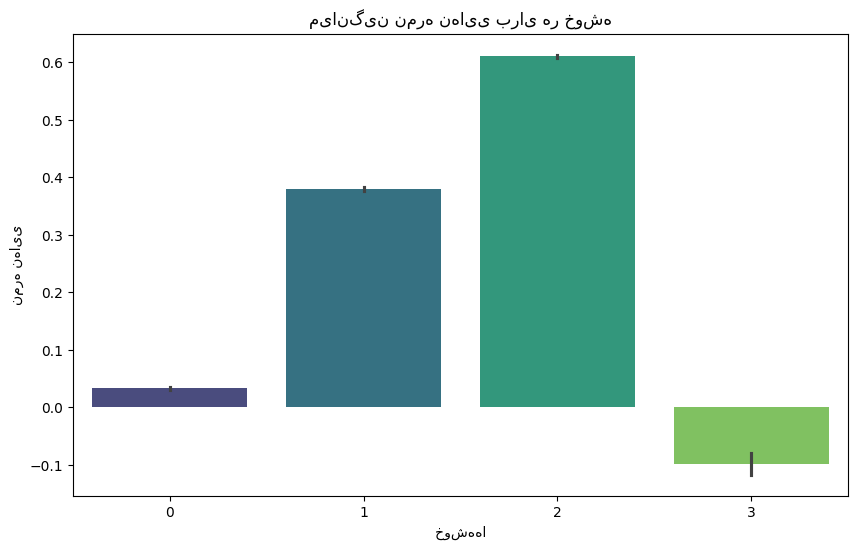

In [12]:
import seaborn as sns

# پیش‌پردازش مجدد داده‌ها
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

scaler = StandardScaler()
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# خوشه‌بندی با K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[selected_features])

# نگاشت وزن‌های AHP
criteria_comparison = Compare('Criteria', criteria, precision=3)
criteria_weights = criteria_comparison.report()
data['AHP_Weight'] = (
    data['pdays'] * criteria_weights['elements']['global_weights']['pdays'] +
    data['campaign'] * criteria_weights['elements']['global_weights']['campaign'] +
    data['previous'] * criteria_weights['elements']['global_weights']['previous']
)

# تحلیل Kano
data['Kano_Score'] = (
    data['housing'] * 0.5 +  # فرض: مسکن، به عنوان نیاز الزامی
    data['loan'] * 0.3 +     # وام، به عنوان نیاز عملکردی
    data['campaign'] * 0.2   # تماس و دردسترس بودن، به عنوان نیاز جذاب
)

# ترکیب داده‌ها
data['Final_Score'] = (
    data['Cluster'] * 0.3 +
    data['AHP_Weight'] * 0.5 +
    data['Kano_Score'] * 0.2
)

# شناسایی بهترین خوشه بر اساس نمره نهایی
best_cluster = data.groupby('Cluster')['Final_Score'].mean().idxmax()
best_cluster_data = data[data['Cluster'] == best_cluster]

# نمایش نتایج
print("بهترین خوشه بر اساس نمره نهایی:", best_cluster)
print("نمونه‌ای از داده‌های خوشه برتر:")
print(best_cluster_data.head())

# مصورسازی نهایی
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Final_Score', data=data, palette='viridis')
plt.title("میانگین نمره نهایی برای هر خوشه")
plt.xlabel("خوشه‌ها")
plt.ylabel("نمره نهایی")
plt.show()


Strategy Summary by Cluster:
    Cluster  Average_Score
0        0       0.141543
1        1       0.233632
2        2       0.295142
3        3       0.106646

Best Cluster for Strategy: 2

Sample of Best Cluster Data:
         age       job   marital  education   default   housing      loan  \
0  1.533034 -0.201579 -0.283741  -1.753925 -0.513600 -1.087707 -0.452491   
1  1.628993  0.911227 -0.283741  -0.349730  1.945327 -1.087707 -0.452491   
2 -0.290186  0.911227 -0.283741  -0.349730 -0.513600  0.942127 -0.452491   
3 -0.002309 -1.036184 -0.283741  -1.285860 -0.513600 -1.087707 -0.452491   
4  1.533034  0.911227 -0.283741  -0.349730 -0.513600 -1.087707  2.311440   

   contact     month  day_of_week  ...  cons.conf.idx  euribor3m  nr.employed  \
0  1.31827  0.762558    -0.718834  ...       0.886447    0.71246      0.33168   
1  1.31827  0.762558    -0.718834  ...       0.886447    0.71246      0.33168   
2  1.31827  0.762558    -0.718834  ...       0.886447    0.71246      0.33168 

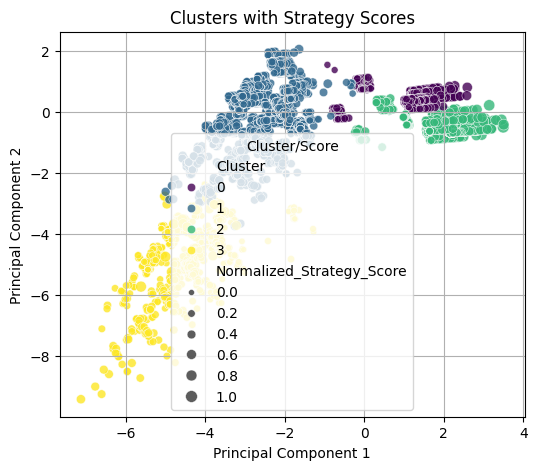


Top Strategies in Best Cluster:
             age       job   marital  education   default   housing      loan  \
4107  -0.769980 -1.036184 -0.283741   1.054464  1.945327 -0.072790  0.929475   
13447 -0.769980  1.467630  1.358578   1.054464 -0.513600  0.942127  2.311440   
4168  -1.057857  1.467630 -0.283741   0.586399 -0.513600  0.942127 -0.452491   
5304   0.381527  0.354824 -0.283741  -0.817795 -0.513600  0.942127 -0.452491   
11033 -0.194227 -0.757982 -0.283741  -1.753925 -0.513600  0.942127 -0.452491   
11769  1.533034  0.633025 -0.283741   0.586399 -0.513600 -1.087707  2.311440   
11593  0.285568  1.467630 -0.283741  -0.349730 -0.513600  0.942127 -0.452491   
10431 -1.345734 -0.757982 -0.283741  -0.817795 -0.513600  0.942127 -0.452491   
4114   1.149199 -0.479781 -0.283741   1.054464 -0.513600 -1.087707 -0.452491   
17897 -0.290186 -1.036184  1.358578  -0.349730 -0.513600  0.942127 -0.452491   

       contact     month  day_of_week  ...  cons.conf.idx  euribor3m  \
4107   1.3182

In [13]:
# 1. ترکیب نتایج و استخراج استراتژی‌ها
# تعریف معیارهای ترکیب: خوشه‌ها، وزن‌های AHP، و پیش‌بینی‌های تحلیل کانو
data['Final_Strategy_Score'] = (
    data['AHP_Weight'] * 0.5 +  # وزن‌دهی 50% به نتایج AHP
    data['Cluster'] * 0.3 +    # وزن‌دهی 30% به خوشه‌بندی
    data['Kano_Score'] * 0.2  # وزن‌دهی 20% به پیش‌بینی کانو
)

# نرمال‌سازی امتیازات استراتژی
data['Normalized_Strategy_Score'] = (
    (data['Final_Strategy_Score'] - data['Final_Strategy_Score'].min()) /
    (data['Final_Strategy_Score'].max() - data['Final_Strategy_Score'].min())
)

# 2. شناسایی بهترین استراتژی‌ها
# گروه‌بندی داده‌ها بر اساس خوشه‌ها و نمایش میانگین نمره استراتژی در هر خوشه
strategy_summary = data.groupby('Cluster')['Normalized_Strategy_Score'].mean().reset_index()
strategy_summary = strategy_summary.rename(columns={'Normalized_Strategy_Score': 'Average_Score'})
print("\nStrategy Summary by Cluster:\n", strategy_summary)

# شناسایی خوشه با بالاترین میانگین نمره
best_cluster = strategy_summary.loc[strategy_summary['Average_Score'].idxmax(), 'Cluster']
print(f"\nBest Cluster for Strategy: {best_cluster}")

# استخراج رکوردهای خوشه برتر
best_cluster_data = data[data['Cluster'] == best_cluster]
print("\nSample of Best Cluster Data:\n", best_cluster_data.head())

# 3. مصورسازی نهایی
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data[selected_features])
data['PCA1'], data['PCA2'] = data_pca[:, 0], data_pca[:, 1]

plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=data, x='PCA1', y='PCA2',
    hue='Cluster', size='Normalized_Strategy_Score', palette='viridis', alpha=0.8
)
plt.title('Clusters with Strategy Scores')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster/Score')
plt.grid()
plt.show()

# 4. تحلیل نتایج بهترین خوشه و نمایش استراتژی‌ها
top_strategies = best_cluster_data.sort_values(by='Normalized_Strategy_Score', ascending=False).head(10)
print("\nTop Strategies in Best Cluster:\n", top_strategies)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')